In [10]:
!pip install flask

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
#importing dataset
df=pd.read_csv("kidney_disease_dataset.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
df.shape

(400, 26)

In [4]:
df.drop('id', axis = 1, inplace = True)

In [5]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [20]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [6]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [8]:
# Extracting categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
print(cat_cols)

['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']


In [9]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [10]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

C:\TURBOC3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\TURBOC3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\TURBOC3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\TURBOC3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pa

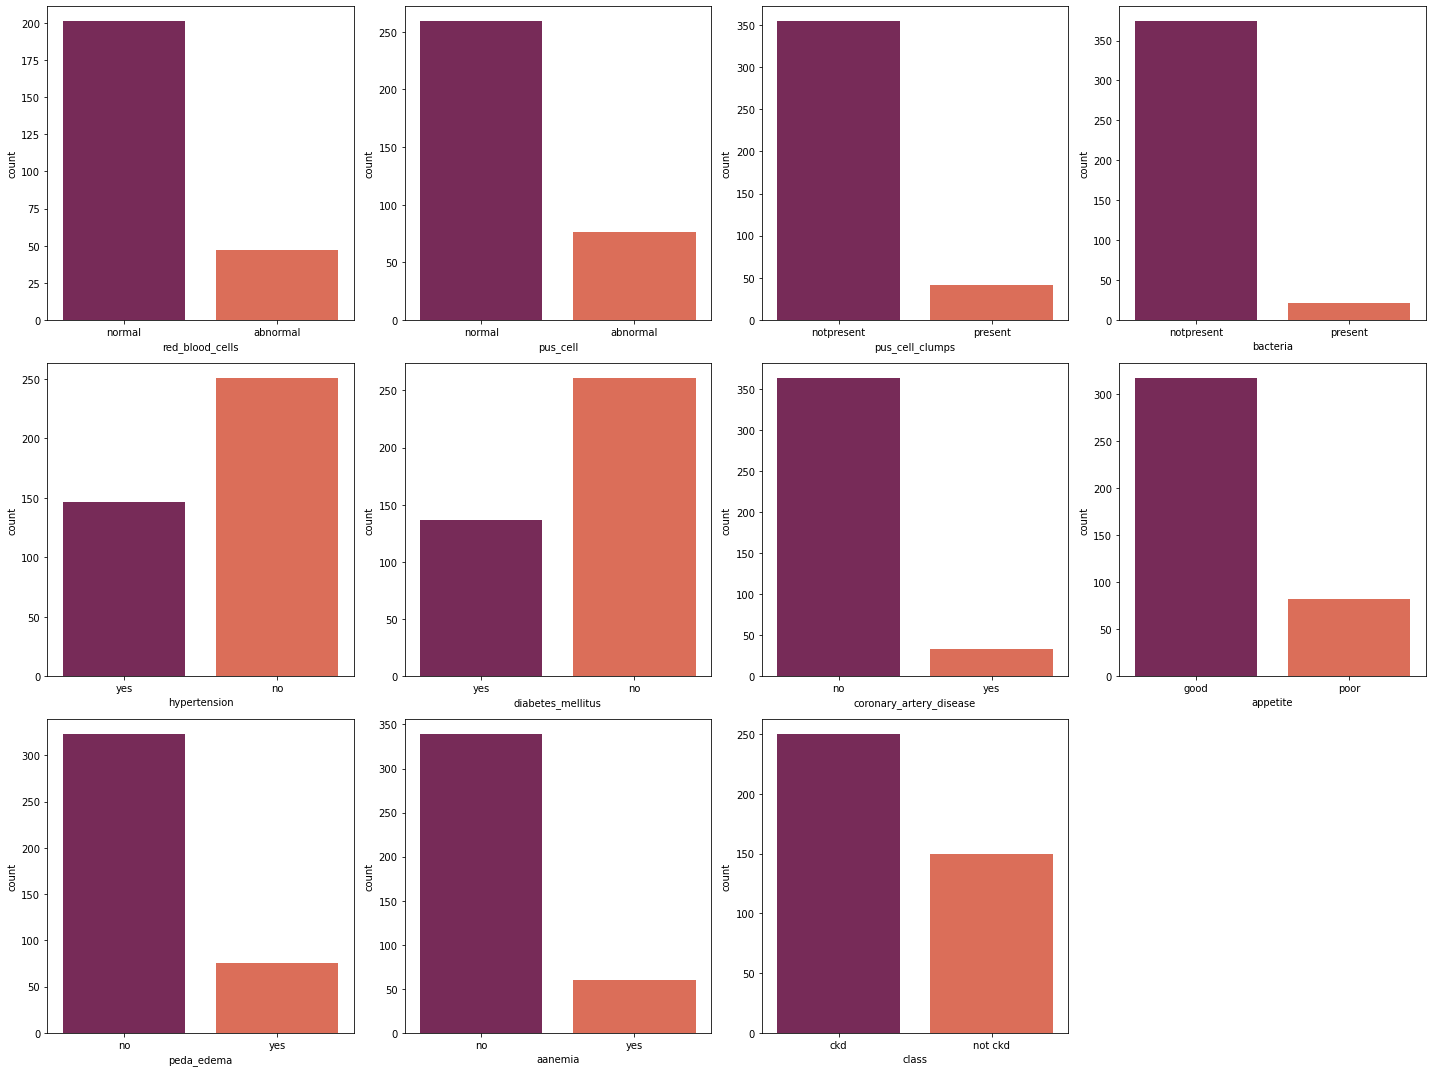

In [27]:
# looking at categorical columns
import seaborn as sns
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# Data preprocessing

# # 1. handling null values

In [11]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [12]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [13]:
from sklearn.impute import KNNImputer
def impute_null(col):
    impute = KNNImputer(n_neighbors=3)
    col_data = df[col].values.reshape(-1, 1)
    df[col] = impute.fit_transform(col_data)
for col in num_cols:
    impute_null(col)

In [14]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [15]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.900000,no,no,no,good,no,no,not ckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.200000,no,no,no,good,no,no,not ckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.400000,no,no,no,good,no,no,not ckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.900000,no,no,no,good,no,no,not ckd


In [16]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [17]:
#mode imputation for categorical features
def impute_mode(col):
    imputer = SimpleImputer(strategy='most_frequent')
    col_data = df[col].values.reshape(-1, 1)
    df[col] = imputer.fit_transform(col_data)
for col in cat_cols:
    impute_mode(col)

In [18]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

# Feature Encoding

In [19]:
#encoding independent variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [37]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,47.0,6700.0,4.900000,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,54.0,7800.0,6.200000,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,49.0,6600.0,5.400000,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,51.0,7200.0,5.900000,0,0,0,0,0,0,1


In [20]:
#dividing into independent and dependent variables
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [39]:
X

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,15.4,44.0,7800.0,5.200000,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,11.3,38.0,6000.0,4.707435,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,9.6,31.0,7500.0,4.707435,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,11.2,32.0,6700.0,3.900000,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,15.7,47.0,6700.0,4.900000,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,16.5,54.0,7800.0,6.200000,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,15.8,49.0,6600.0,5.400000,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,14.2,51.0,7200.0,5.900000,0,0,0,0,0,0


In [40]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int32

# Feature scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [22]:
new_features = scaler.transform(X)
print(new_features)

[[0.52272727 0.23076923 0.75       ... 0.         0.         0.        ]
 [0.05681818 0.         0.75       ... 0.         0.         0.        ]
 [0.68181818 0.23076923 0.25       ... 1.         0.         1.        ]
 ...
 [0.11363636 0.23076923 0.75       ... 0.         0.         0.        ]
 [0.17045455 0.07692308 1.         ... 0.         0.         0.        ]
 [0.63636364 0.23076923 1.         ... 0.         0.         0.        ]]


In [23]:
 # splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_features, y, test_size = 0.25, random_state=67)

# Without PCA

In [24]:
from mlxtend.plotting import plot_confusion_matrix

Training Accuracy of KNN is 0.99
Test Accuracy of KNN is 0.98 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        57
           1       0.96      1.00      0.98        43

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



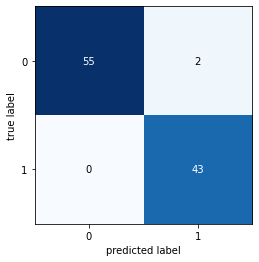

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_acc = accuracy_score(y_test,knn.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, knn.predict(X_test)))
plt.show()

Training Accuracy of knn is 0.99
Test Accuracy of knn is 0.95 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        57
           1       1.00      0.88      0.94        43

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



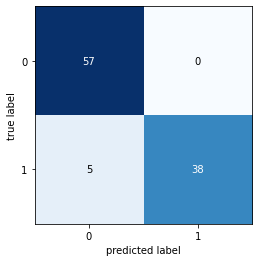

In [57]:
dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
knn_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Training Accuracy of knn is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of knn is {dtc_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, dtc.predict(X_test)))
plt.show()

0.99


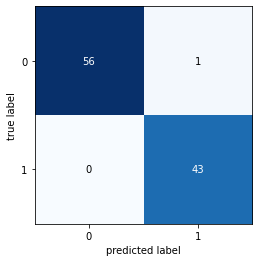

In [46]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
naive_acc = accuracy_score(y_test,classifier.predict(X_test))
print(naive_acc)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, classifier.predict(X_test)))
plt.show()

Training Accuracy of Decision tree is 1.0
Test Accuracy of Decision tree is 0.92 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        57
           1       0.91      0.91      0.91        43

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



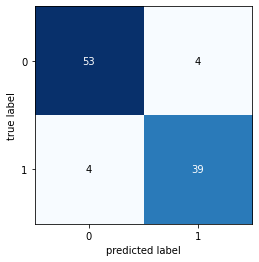

In [47]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=67)
dtc.fit(X_train,y_train)
dtc_acc = accuracy_score(y_test,dtc.predict(X_test))
print(f"Training Accuracy of Decision tree is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision tree is {dtc_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, dtc.predict(X_test)))
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5],
    'min_samples_split' : [1, 2, 3, 5],
    'max_features' : ['auto', 'sqrt', 'log2']
}
grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


C:\TURBOC3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
960 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
459 fits failed with the following error:
Traceback (most recent call last):
  File "C:\TURBOC3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\TURBOC3\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\TURBOC3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\TURBOC3\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_paramete

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=67), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [1, 2, 3, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [49]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)


{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.9766666666666668


Training Accuracy of Decision Tree Classifier is 0.99
Test Accuracy of Decision Tree Classifier is 0.95 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        57
           1       1.00      0.88      0.94        43

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



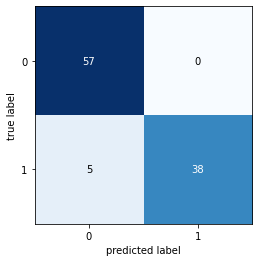

In [50]:
# best estimator
dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, dtc.predict(X_test)))
plt.show()

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       1.00      0.93      0.96        43

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



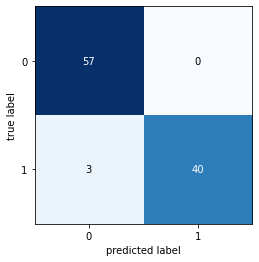

In [51]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rd_clf = RandomForestClassifier(random_state=67)
rd_clf.fit(X_train, y_train)

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, rd_clf.predict(X_test)))
plt.show()

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.96 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        57
           1       1.00      0.91      0.95        43

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100



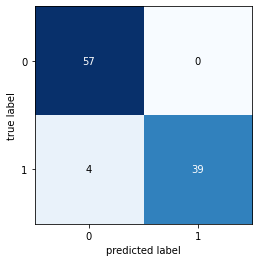

In [52]:
#gradient boost
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=67)
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, gb.predict(X_test)))
plt.show()


Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.96 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        57
           1       1.00      0.91      0.95        43

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100



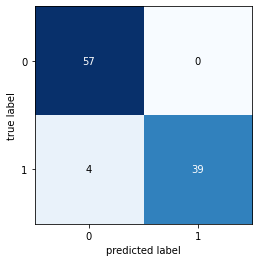

In [59]:
#Stochastic Gradient Boosting
sgb = GradientBoostingClassifier(random_state=67)

sgb.fit(X_train, y_train)

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, sgb.predict(X_test)))
plt.show()

Learning rate set to 0.5
0:	learn: 0.1853953	total: 121ms	remaining: 364ms
1:	learn: 0.1058494	total: 127ms	remaining: 127ms
2:	learn: 0.0581878	total: 135ms	remaining: 44.8ms
3:	learn: 0.0398841	total: 141ms	remaining: 0us
Training Accuracy of Cat Boost Classifier is 0.9933333333333333
Test Accuracy of Cat Boost Classifier is 0.97 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        57
           1       0.98      0.95      0.96        43

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



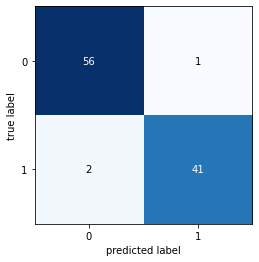

In [53]:
#catboost
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=4)
cat.fit(X_train, y_train)

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, cat.predict(X_test)))
plt.show()

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.99 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       1.00      0.98      0.99        43

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



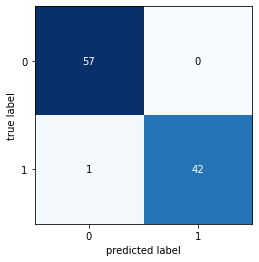

In [54]:
#extra tree
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state=67)
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, etc.predict(X_test)))
plt.show()

[LightGBM] [Info] Number of positive: 107, number of negative: 193
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 512
[LightGBM] [Info] Number of data points in the train set: 300, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356667 -> initscore=-0.589861
[LightGBM] [Info] Start training from score -0.589861
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

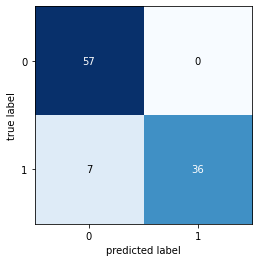

In [55]:
#LGBM
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 0.01)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")
print(classification_report(y_test, lgbm.predict(X_test)))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, lgbm.predict(X_test)))
plt.show()

In [60]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting','Cat Boost', 'Extra Trees Classifier','LGBM Classifier'],
    'Test_Score' : [knn_acc, dtc_acc, rd_clf_acc, gb_acc, sgb_acc, cat_acc, etc_acc,lgbm_acc]
})

models.sort_values(by = 'Test_Score', ascending = False)

,Model,Test_Score
6,Extra Trees Classifier,0.99
2,Random Forest Classifier,0.97
5,Cat Boost,0.97
3,Gradient Boosting Classifier,0.96
4,Stochastic Gradient Boosting,0.96
0,KNN,0.95
1,Decision Tree Classifier,0.95
7,LGBM Classifier,0.93


In [171]:
!pip install tensorflow

In [55]:
!pip install --upgrade tensorflow


  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl (2.1 kB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [61]:
import tensorflow
from tensorflow import keras
from keras import layers , Input 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import  plot_model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras import layers

In [51]:
!pip install --upgrade numpy

In [62]:
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.accuracy=[]
        self.val_accuracy=[]
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.accuracy.append(logs.get('accuracy'))
        self.val_accuracy.append(logs.get('val_accuracy'))
        
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [63]:
# Initialising the ANN
model_S = Sequential()

# Adding the input layer and the first hidden layer
model_S.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24))
model_S.add(Dropout(rate = 0.1))

# Adding the second hidden layer
model_S.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model_S.add(Dropout(rate = 0.1))

# Adding the third hidden layer
model_S.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model_S.add(Dropout(rate = 0.1))

# Adding the output layer
model_S.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model_S.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_S.summary()

C:\TURBOC3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,473 (5.75 KB)

 Non-trainable params: 0 (0.00 B)

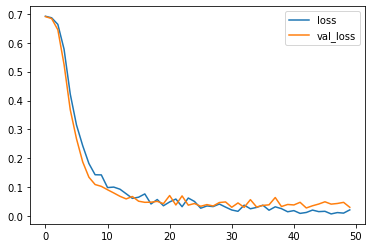

30/30 - 0s - 15ms/step - accuracy: 1.0000 - loss: 0.0216 - val_accuracy: 0.9833 - val_loss: 0.0306


In [64]:
history = model_S.fit(X_train,y_train,epochs=50,batch_size=8,verbose=2,validation_split=0.2, callbacks=[plot_losses])

In [65]:
score1 = model_S.evaluate(X_train,
                       y_train,
                       verbose=0)
print("\nTrain accuracy: %.1f%%" % (100.0 * score1[1]))



Train accuracy: 99.7%


In [66]:
# model accuracy on test dataset
score = model_S.evaluate(X_test,
                       y_test,
                       verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 97.0%


In [67]:
eval_score = model_S.evaluate(X_test, y_test)
print("Test loss:", eval_score[0])
print("Test accuracy:", eval_score[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9755 - loss: 0.0576 
Test loss: 0.055159345269203186
Test accuracy: 0.9700000286102295


# With PCA

[[ 2.42548742e-01 -8.19267595e-01 -2.14567202e-01 ... -5.31037836e-02
   5.20915646e-03  2.01716062e-04]
 [-5.31227879e-01  2.08729815e-01 -3.43794166e-02 ...  1.15576737e-02
   6.88382811e-03  1.10048697e-02]
 [ 6.60482971e-01 -2.30480775e-01  3.33494062e-01 ... -7.06439011e-03
  -9.40710775e-03  3.54420264e-03]
 ...
 [-8.10048348e-01  5.60333007e-02  4.32195368e-02 ... -4.69186707e-03
   4.70601452e-04 -1.90674818e-02]
 [-8.48383661e-01  3.86412227e-02  7.12250326e-02 ...  4.38603441e-02
   1.26390079e-02 -3.78618794e-02]
 [-8.37080842e-01 -2.73481580e-02  3.44574058e-02 ...  5.41231268e-02
   6.27333782e-03  2.10688502e-03]]

Explained Variance Ratio:
[0.36264572 0.11563383 0.08084287 0.07081765 0.05699671 0.05169769
 0.04589876 0.03704655 0.03223039 0.02516989 0.02394647 0.02053421
 0.01738572 0.01327675 0.01109864 0.00705811 0.00593003 0.00535047
 0.00469379 0.00426265 0.00266759 0.00257481 0.00159193 0.00064878]


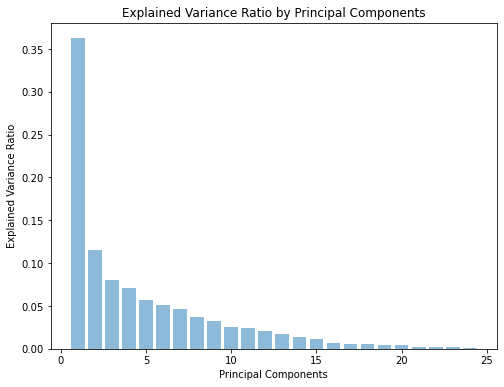

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(new_features)
# Explained variance ratio
print(X_pca)
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

# Plotting explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


Training Accuracy of KNN is 0.9875
Test Accuracy of KNN is 0.9875 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



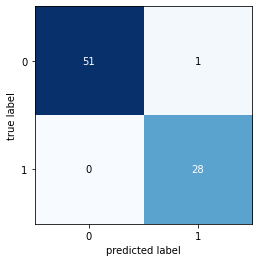

In [70]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_acc = accuracy_score(y_test,knn.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, knn.predict(X_test)))
plt.show()

[LightGBM] [Info] Number of positive: 122, number of negative: 198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2582
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381250 -> initscore=-0.484246
[LightGBM] [Info] Start training from score -0.484246
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

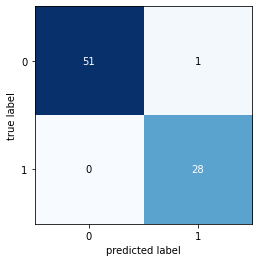

In [73]:
#LGBM
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 0.01)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")
print(classification_report(y_test, lgbm.predict(X_test)))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, lgbm.predict(X_test)))
plt.show()

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 1.0 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



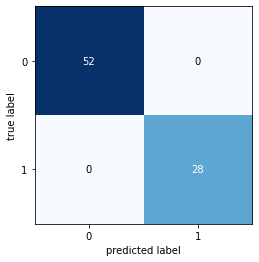

In [184]:
#extra tree
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state=67)
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, etc.predict(X_test)))
plt.show()

Training Accuracy of KNN is 1.0
Test Accuracy of KNN is 0.9875 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



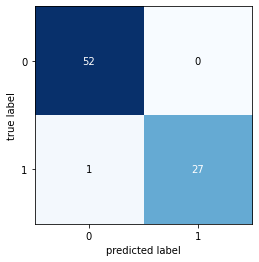

In [74]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=67)
dtc.fit(X_train,y_train)
dtc_acc = accuracy_score(y_test,dtc.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of KNN is {dtc_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, dtc.predict(X_test)))
plt.show()

In [75]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5],
    'min_samples_split' : [1, 2, 3, 5],
    'max_features' : ['auto', 'sqrt', 'log2']
}
grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


C:\TURBOC3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
960 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
299 fits failed with the following error:
Traceback (most recent call last):
  File "C:\TURBOC3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\TURBOC3\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\TURBOC3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\TURBOC3\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_paramete

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=67), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [1, 2, 3, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [76]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)


{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}
0.965625


Training Accuracy of Decision Tree Classifier is 0.9875
Test Accuracy of Decision Tree Classifier is 1.0 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



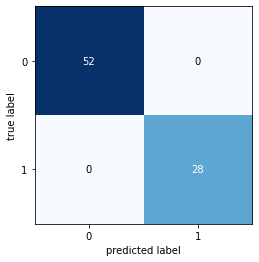

In [77]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, dtc.predict(X_test)))
plt.show()

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9875 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



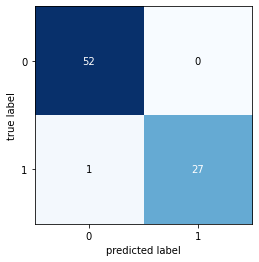

In [78]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rd_clf = RandomForestClassifier(random_state=67)
rd_clf.fit(X_train, y_train)

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, rd_clf.predict(X_test)))
plt.show()

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9875 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



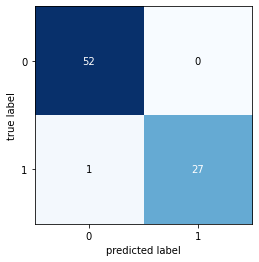

In [79]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=67)
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, gb.predict(X_test)))
plt.show()


Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.9875 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



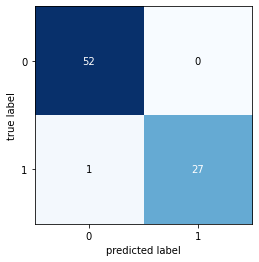

In [81]:
#Stochastic Gradient Boosting
sgb = GradientBoostingClassifier(random_state=67)

sgb.fit(X_train, y_train)

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, sgb.predict(X_test)))
plt.show()

Learning rate set to 0.5
0:	learn: 0.1959360	total: 12.4ms	remaining: 37.1ms
1:	learn: 0.0729690	total: 22.6ms	remaining: 22.6ms
2:	learn: 0.0404669	total: 32.2ms	remaining: 10.7ms
3:	learn: 0.0256900	total: 41.7ms	remaining: 0us
Training Accuracy of Cat Boost Classifier is 0.99375
Test Accuracy of Cat Boost Classifier is 0.9875 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



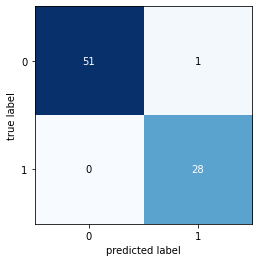

In [80]:
#CatBoostClassifier
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=4)
cat.fit(X_train, y_train)

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, cat.predict(X_test)))
plt.show()

In [82]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting','Cat Boost', 'Extra Trees Classifier','LGBM Classifier'],
    'Test_Score' : [knn_acc, dtc_acc, rd_clf_acc, gb_acc, sgb_acc, cat_acc, etc_acc,lgbm_acc]
})

models.sort_values(by = 'Test_Score', ascending = False)

,Model,Test_Score
1,Decision Tree Classifier,1.0000
6,Extra Trees Classifier,0.9900
0,KNN,0.9875
2,Random Forest Classifier,0.9875
3,Gradient Boosting Classifier,0.9875
4,Stochastic Gradient Boosting,0.9875
5,Cat Boost,0.9875
7,LGBM Classifier,0.9875


In [83]:
import tensorflow
from tensorflow import keras
from keras import layers , Input 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import  plot_model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras import layers

In [84]:
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.accuracy=[]
        self.val_accuracy=[]
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.accuracy.append(logs.get('accuracy'))
        self.val_accuracy.append(logs.get('val_accuracy'))
        
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [85]:
# Initialising the ANN
model_S = Sequential()

# Adding the input layer and the first hidden layer
model_S.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24))
model_S.add(Dropout(rate = 0.1))

# Adding the second hidden layer
model_S.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model_S.add(Dropout(rate = 0.1))

# Adding the third hidden layer
model_S.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model_S.add(Dropout(rate = 0.1))

# Adding the output layer
model_S.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model_S.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_S.summary()

C:\TURBOC3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,473 (5.75 KB)

 Non-trainable params: 0 (0.00 B)

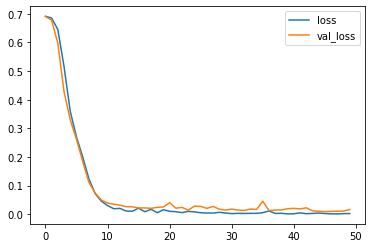

32/32 - 1s - 23ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0160


In [86]:
history = model_S.fit(X_train,y_train,epochs=50,batch_size=8,verbose=2,validation_split=0.2, callbacks=[plot_losses])

In [88]:
score1 = model_S.evaluate(X_train,y_train,verbose=0)
print("\nTrain accuracy: %.1f%%" % (100.0 * score1[1]))


Train accuracy: 100.0%


In [89]:
# model accuracy on test dataset
score = model_S.evaluate(X_test,
                       y_test,
                       verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 100.0%


In [90]:
eval_score = model_S.evaluate(X_test, y_test)
print("Test loss:", eval_score[0])
print("Test accuracy:", eval_score[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0038 
Test loss: 0.002408071421086788
Test accuracy: 1.0


In [1]:
def calculate_egfr(age, creatinine):
    if creatinine <= 0.7:
        factor = 141 * (creatinine / 0.9) ** (-0.411)
    else:
        factor = 141 * (creatinine / 0.9) ** (-1.209)

    egfr = factor * (min(age / 60, 1) ** 0.411) * (max(age / 60, 1) ** (-0.329))

    return egfr

# Example usage:
age =60
serum_creatinine = 1.9
egfr = calculate_egfr(age, serum_creatinine)
print(egfr)

57.13275977867035
